# **DATA CLEANING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Memuat data dari file CSV
data = pd.read_csv('dataset_stunting.csv')

In [ ]:
# Menampilkan beberapa baris pertama dari data
print(data.head())

   Sum of Konsumsi_protein  Sum of BCG  \
0                       87      896261   
1                     1032      867710   
2                      901      903907   
3                      935      630965   
4                      994      779955   

   Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu  \
0                                             336139                                         
1                                             263972                                         
2                                             224525                                         
3                                             226436                                         
4                                             276069                                         

   Sum of kapitaekonomi.Pendapatan  Sum of kode_provinsi  \
0                              NaN                    32   
1                     26554.666667                    32   
2 

In [ ]:
# 1. Mengisi Data Hilang
# Menggunakan interpolasi
data.interpolate(method='linear', inplace=True)

In [ ]:
# Jika masih ada data yang hilang, kita bisa menggunakan rata-rata
data.fillna(data.mean(), inplace=True)

In [ ]:
# Jika Anda ingin menggunakan regresi untuk mengisi data hilang, Anda bisa menggunakan model regresi
# Contoh sederhana menggunakan regresi linier
from sklearn.linear_model import LinearRegression

In [ ]:
# Misalkan kita ingin mengisi kolom 'stunting' yang hilang
if data['Sum of kapitaekonomi.Pendapatan'].isnull().any():
    # Membagi data menjadi fitur dan target
    data_with_na = data[data['Sum of kapitaekonomi.Pendapatan'].isnull()]
    data_without_na = data[data['Sum of kapitaekonomi.Pendapatan'].notnull()]

    # Misalkan kita menggunakan tahun sebagai fitur
    X_train = data_without_na[['tahun']]  # Ganti 'tahun' dengan nama kolom tahun Anda
    y_train = data_without_na['Sum of kapitaekonomi.Pendapatan']

    # Melatih model regresi
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Mengisi nilai yang hilang
    X_test = data_with_na[['tahun']]
    data.loc[data['Sum of kapitaekonomi.Pendapatan'].isnull(), 'Sum of kapitaekonomi.Pendapatan'] = model.predict(X_test)


In [ ]:
# Menampilkan data setelah pengisian
print(data.head())

   Sum of Konsumsi_protein  Sum of BCG  \
0                       87      896261   
1                     1032      867710   
2                      901      903907   
3                      935      630965   
4                      994      779955   

   Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu  \
0                                             336139                                         
1                                             263972                                         
2                                             224525                                         
3                                             226436                                         
4                                             276069                                         

   Sum of kapitaekonomi.Pendapatan  Sum of kode_provinsi  \
0                     29039.328042                    32   
1                     26554.666667                    32   
2 

In [ ]:
# 2. Standarisasi Data
scaler = StandardScaler()

In [ ]:
# Menampilkan data setelah standarisasi
print(data.head())

   Sum of Konsumsi_protein  Sum of BCG  \
0                       87      896261   
1                     1032      867710   
2                      901      903907   
3                      935      630965   
4                      994      779955   

   Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu  \
0                                             336139                                         
1                                             263972                                         
2                                             224525                                         
3                                             226436                                         
4                                             276069                                         

   Sum of kapitaekonomi.Pendapatan  Sum of kode_provinsi  \
0                     29039.328042                    32   
1                     26554.666667                    32   
2 

In [ ]:
# Menyimpan data yang sudah dibersihkan ke file baru
data.to_csv('data_stunting_cleaned.csv', index=False)

# **FEATURE ENGINEER**

In [ ]:
data = pd.read_csv('data_stunting_cleaned.csv')

In [ ]:
data['tahun'] = pd.to_datetime(data['tahun'], format='%Y')

In [ ]:
data.set_index('tahun', inplace=True)

In [ ]:
print(data.head())

            Sum of Konsumsi_protein  Sum of BCG  \
tahun                                             
2016-01-01                       87      896261   
2017-01-01                     1032      867710   
2018-01-01                      901      903907   
2019-01-01                      935      630965   
2020-01-01                      994      779955   

            Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu  \
tahun                                                                                                 
2016-01-01                                             336139                                         
2017-01-01                                             263972                                         
2018-01-01                                             224525                                         
2019-01-01                                             226436                                         
2020-01-01              

In [ ]:
data['PDRB_lag_1'] = data['Sum of kapitaekonomi.Pendapatan'].shift(1)  # Ganti 'PDRB' dengan nama kolom yang sesuai
data['PDRB_lag_2'] = data['Sum of kapitaekonomi.Pendapatan'].shift(2)  # Ganti 'PDRB' dengan nama kolom yang sesuai
data['PDRB_lag_3'] = data['Sum of kapitaekonomi.Pendapatan'].shift(3)  # Ganti 'PDRB' dengan nama kolom yang sesuai


In [ ]:
data['moving_average_consumsi_ungas'] = data['Sum of Konsumsi_protein'].rolling(window=3).mean()  # Ganti 'konsumsi_ungas' dengan nama kolom yang sesuai


In [ ]:
print(data.tail())

            Sum of Konsumsi_protein  Sum of BCG  \
tahun                                             
2019-01-01                      935      630965   
2020-01-01                      994      779955   
2021-01-01                     1034      898067   
2022-01-01                     1079      839924   
2023-01-01                      110      797433   

            Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu  \
tahun                                                                                                 
2019-01-01                                             226436                                         
2020-01-01                                             276069                                         
2021-01-01                                             206514                                         
2022-01-01                                             180042                                         
2023-01-01              

In [ ]:
data.to_csv('data_stunting_feature_engineered.csv', index=True)

## **DATASET FORMAT LSTM**


In [ ]:
import numpy as np

In [ ]:
def create_dataset(data, history_size, target_size):
    X, y = [], []
    for i in range(len(data) - history_size - target_size + 1):
        X.append(data[i:(i + history_size)])
        y.append(data[i + history_size + target_size - 1])  # Output adalah angka stunting tahun berikutnya
    return np.array(X), np.array(y)

In [ ]:
# Contoh penggunaan
# Misalkan 'data' adalah DataFrame yang berisi variabel independen
data = pd.read_csv('data_stunting_feature_engineered.csv')  # Ganti dengan nama file Anda
features = data[['Sum of kapitaekonomi.Pendapatan', 'Sum of Konsumsi_protein', 'Sum of BCG']].values  # Ganti dengan kolom yang sesuai


In [ ]:
# Tentukan ukuran jendela
history_size = 3  # Misalnya 3 tahun sebelumnya
target_size = 1   # 1 tahun ke depan

In [ ]:
# Membuat dataset
X, y = create_dataset(features, history_size, target_size)

In [ ]:
# Menampilkan bentuk dataset
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (5, 3, 3)
Output shape: (5, 3)


# **SPLITTING DATA SET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Fungsi untuk membuat dataset (seperti yang telah dijelaskan sebelumnya)
def create_dataset(data, history_size, target_size):
    X, y = [], []
    for i in range(len(data) - history_size - target_size + 1):
        X.append(data[i:(i + history_size)])
        y.append(data[i + history_size + target_size - 1])  # Output adalah angka stunting tahun berikutnya
    return np.array(X), np.array(y)

In [ ]:
# Membaca data dari file CSV
data = pd.read_csv('data_stunting_feature_engineered.csv')  # Ganti dengan nama file Anda
features = data[['Sum of kapitaekonomi.Pendapatan', 'Sum of Konsumsi_protein', 'Sum of BCG']].values  # Ganti dengan kolom yang sesuai


In [ ]:
# Tentukan ukuran jendela
history_size = 3  # Misalnya 3 tahun sebelumnya
target_size = 1   # 1 tahun ke depan

In [ ]:
# Membuat dataset
X, y = create_dataset(features, history_size, target_size)

In [ ]:
# Memisahkan dataset menjadi Training Set dan Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Memisahkan Training Set menjadi Training dan Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [ ]:
# Menampilkan bentuk dataset
print("Training Set shape:", X_train.shape, y_train.shape)
print("Validation Set shape:", X_val.shape, y_val.shape)
print("Test Set shape:", X_test.shape, y_test.shape)

Training Set shape: (3, 3, 3) (3, 3)
Validation Set shape: (1, 3, 3) (1, 3)
Test Set shape: (1, 3, 3) (1, 3)


In [ ]:
# Misalkan kita sudah memiliki X_train, y_train, X_val, y_val, X_test, y_test
# Contoh data (ganti dengan data Anda)
X_train = np.random.rand(3, 3, 3)  # Contoh data training
y_train = np.random.rand(3, 3)      # Contoh target training
X_val = np.random.rand(1, 3, 3)     # Contoh data validation
y_val = np.random.rand(1, 3)         # Contoh target validation
X_test = np.random.rand(1, 3, 3)    # Contoh data test
y_test = np.random.rand(1, 3)        # Contoh target test

# Fungsi untuk menyimpan dataset ke format CSV
def save_to_csv(X, y, filename):
    # Mengonversi X dan y ke DataFrame
    df_X = pd.DataFrame(X.reshape(X.shape[0], -1))  # Mengubah bentuk X menjadi 2D
    df_y = pd.DataFrame(y, columns=['stunting_1', 'stunting_2', 'stunting_3'])  # Ganti dengan nama kolom yang sesuai
    df = pd.concat([df_X, df_y], axis=1)  # Menggabungkan X dan y
    df.to_csv(filename, index=False)  # Menyimpan ke CSV

# Menyimpan masing-masing set
save_to_csv(X_train, y_train, 'train_set.csv')
save_to_csv(X_val, y_val, 'val_set.csv')
save_to_csv(X_test, y_test, 'test_set.csv')

print("Dataset telah disimpan ke format CSV.")

Dataset telah disimpan ke format CSV.


# **MODEL LSTM**

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Misalkan kita sudah memiliki data yang telah dinormalisasi
# Contoh data (ganti dengan data Anda)
data = pd.read_csv('data_stunting_feature_engineered.csv')  # Ganti dengan nama file Anda
data = data['Sum of dinkes-od_17147_jumlah_balita_stunting_berdasarkan_kabupatenkota_v1 (3).Data_stu'].values  # Mengambil kolom yang relevan
data = data.reshape(-1, 1)

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Memisahkan dataset menjadi Training Set dan Test Set
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Memisahkan Training Set menjadi Training dan Validation Set
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [ ]:
# Memisahkan dataset menjadi Training Set dan Test Set
# Menggunakan scaled_data yang telah dinormalisasi
X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42) # Menggunakan scaled_data
# Memisahkan Training Set menjadi Training dan Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Membuat dataset dengan timesteps
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1): # Perbaikan: dikurangi 1 agar index tidak melebihi batas
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])


In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Menggunakan Input layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

In [ ]:
# Mengkompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Melatih model
history=model.fit(X_train, y_train, epochs=100, batch_size=32)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))  # Add validation_data


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0071
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0051
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0032
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0021
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0025
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0015
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0164
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0027
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0044
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0019
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.0086
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.0073
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0013
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0113
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0022
Epoch 16/100


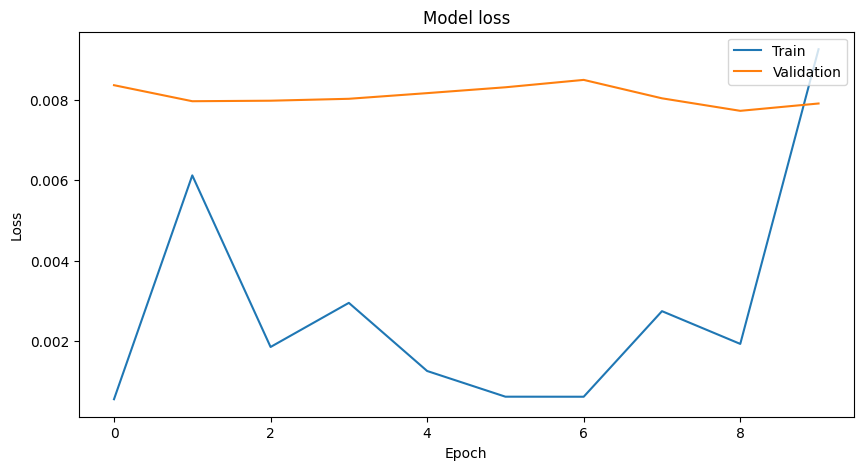

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Memprediksi data
predicted_stunting = model.predict(X_test)
predicted_stunting_original_scale = scaler.inverse_transform(predicted_stunting.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


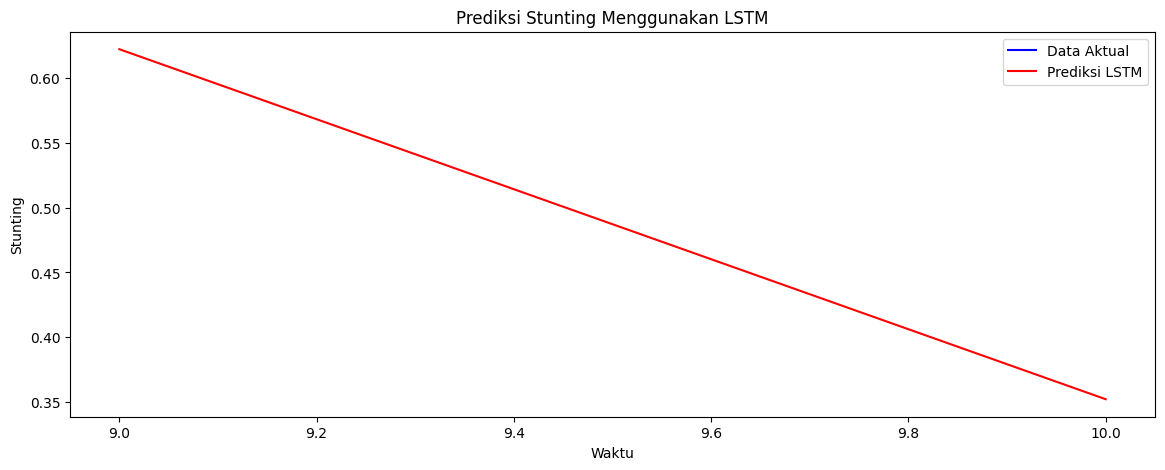

In [ ]:
# Memvisualisasikan hasil
plt.figure(figsize=(14, 5))
plt.plot(data[train_size + time_step:], color='blue', label='Data Aktual')
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(predicted_stunting)), predicted_stunting, color='red', label='Prediksi LSTM')
plt.title('Prediksi Stunting Menggunakan LSTM')
plt.xlabel('Waktu')
plt.ylabel('Stunting')
plt.legend()
plt.show()